In [40]:
#Importamos e instalamos las carpetas necesarias para el proyecto

import bs4 as bs
import json

#data manipulation
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import requests
import csv


#stats
from scipy import stats

#preprocesado de datos
from sklearn.model_selection import train_test_split 
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import FunctionTransformer


#pipelines_gridsearch_crossvalidations
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

#modelos ML
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor as CTR

#metricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error


import warnings
warnings.filterwarnings('ignore')
#! pip install scikit-learn
#! pip install seaborn

In [23]:
#Imprimimos la tabla con el set de datos con los que vamos a trabajar
data = pd.read_csv("EDA_final3")
data

,metacritic,rating,playtime,achievements_count,suggestions_count,game_series_count,Owned,Finished,Pending,Dropped,Playing,First_Genre,Second_Genre,Plat_conv,Developers,Publishers
0,75.0,3.25,3,104,438,0,564,10,9,3,2,Action,Adventure,Multiplatform,Borealys Games,Borealys Games
1,77.0,3.12,2,121,546,4,603,3,6,13,4,Action,Strategy,Multiplatform,Kalypso Media,Kalypso Media
2,81.0,3.76,3,87,605,0,294,23,8,17,2,Action,Adventure,Multiplatform,Vertigo Games,Vertigo Games
3,61.0,0.00,5,25,563,0,56,0,1,0,0,RPG,Indie,Multiplatform,CINEMAX,Cinemax
4,68.0,3.54,4,58,479,0,1480,26,20,119,10,Action,Strategy,Multiplatform,Keen Software House,Keen Software House
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4727,81.0,3.92,4,21,153,0,539,81,10,6,0,Adventure,RPG,Multiplatform,Kyle Seeley,Kyle Seeley
4728,86.0,4.30,12,152,325,0,584,50,43,35,52,Action,Strategy,Multiplatform,Creative Assembly,SEGA
4729,68.0,3.67,5,75,685,0,141,3,3,8,0,Strategy,Massively Multiplayer,Multiplatform,Nival Interactive,Nival
4730,71.0,3.12,3,41,369,0,758,7,1,18,3,Strategy,Simulation,PC,Fakt Software,Daedalic Entertainment


In [24]:
X = data
y = X.pop("Owned")

## Identificación del Problema de ML (Clasificacion/Regresión...)
En este caso es un problema de regresión para estimar el número de personas que comprarán el juego ("Owned") el cual es un atributo numérico

## Análisis del target. 
En este caso, como ya se ha comentado anteriormente, el target es Owned, cuantos usuarios poseen el juego 

<AxesSubplot: >

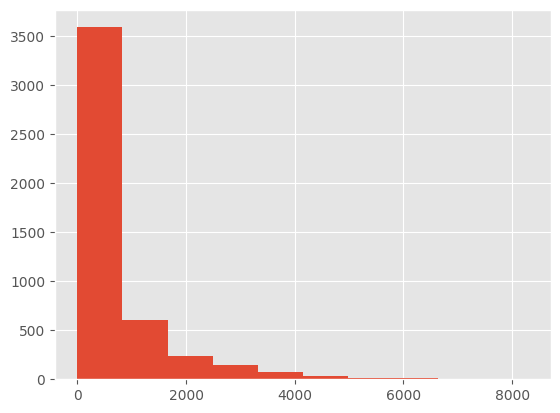

In [25]:
y.hist()

In [26]:
y.skew()

2.7929067996720724

In [6]:
y.kurt()

9.984068039961416

Aunque se podía apreciar a simple vista, los análisis del skew y la kurtosis confirman que la distribución es claramente no normal, por lo que será necesario aplicar algún tipo de transformación (BoxCox, yeo-johson, Logaritmo, etc.) para convertirla a normal.

In [7]:
y = list(y)

In [8]:
y = np.reshape(y,(-1,1))

In [27]:
X.isna().sum()

metacritic               0
rating                   0
playtime                 0
achievements_count       0
suggestions_count        0
game_series_count        0
Finished                 0
Pending                  0
Dropped                  0
Playing                  0
First_Genre             47
Second_Genre          1134
Plat_conv                0
Developers             118
Publishers              92
dtype: int64

In [28]:
X["Second_Genre"]=X["Second_Genre"].fillna(value=np.nan)
X["Developers"]=X["Developers"].fillna(value=np.nan)
X["First_Genre"]=X["First_Genre"].fillna(value=np.nan)
X["Publishers"]=X["Publishers"].fillna(value=np.nan)

In [29]:
#Imputación mediante SimpleImputer
 
imputer = SimpleImputer(strategy='most_frequent')
X_simple = pd.DataFrame(imputer.fit_transform(X),index=X.index,columns=X.columns)

In [30]:
X_simple.isna().sum()

metacritic            0
rating                0
playtime              0
achievements_count    0
suggestions_count     0
game_series_count     0
Finished              0
Pending               0
Dropped               0
Playing               0
First_Genre           0
Second_Genre          0
Plat_conv             0
Developers            0
Publishers            0
dtype: int64

In [31]:
#Encodeamos los datos categóricos con OneHotEncoder
ohe1=OneHotEncoder(handle_unknown='ignore', sparse=False)
ohe1.fit(X_simple[["Plat_conv", "First_Genre", "Second_Genre", "Developers", "Publishers"]])
X_enc= pd.DataFrame(ohe1.transform(X_simple[["Plat_conv", "First_Genre", "Second_Genre", "Developers", "Publishers"]]))

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_enc, y, test_size = 0.20, random_state = 0)

In [33]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=10, random_state=42)

In [34]:
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [35]:
tree_reg.score(X_test, y_test)

0.0537905635388366

## PROBAMOS CON GRIDSEARCH Y DECISION TREE

In [36]:
dt2=DecisionTreeRegressor(random_state=42)  #modelo base, es un modelo sin tunear
param_grid = {'max_depth': [1, 5, 10, 20, 50, 100], #esto es la malla de posibles valores para tunear
              'min_samples_split': [2, 5, 10, 20, 50],
              'min_samples_leaf': [1, 2, 5, 10, 20]}


dt1GSCV = GridSearchCV(estimator = dt2, #modelo GS que es básicamente como un envoltorio al modelo base
param_grid = param_grid,
n_jobs = -1, #usar toda la CPU
cv = 10,scoring="neg_mean_squared_error",return_train_score=True)
dt1GSCV.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10, 20, 50, 100],
                         'min_samples_leaf': [1, 2, 5, 10, 20],
                         'min_samples_split': [2, 5, 10, 20, 50]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [37]:
dt1GSCV.best_params_

{'max_depth': 20, 'min_samples_leaf': 10, 'min_samples_split': 50}

In [38]:
dtGS=dt1GSCV.best_estimator_

In [39]:
dtGS.score(X_test, y_test)

0.12135835381853921

In [41]:
ctr=CTR(verbose=0, random_state=42) #verbose es para que no te cuente cada iteracion como va

param_grid_ctr_GSCV = {'depth': [1, 2, 3, 4, 5, 6, 7], #esto es la malla de posibles valores para tunear
                            'learning_rate': [0.001, 0.01, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99, 0.999, 1]}
ctr.fit(X_train, y_train)
ctr_GSCV = GridSearchCV(estimator = ctr, #modelo GS que es básicamente como un envoltorio al modelo base
param_grid = param_grid_ctr_GSCV,
n_jobs = -1, #usar toda la CPU
cv = 10,scoring="neg_mean_squared_error",return_train_score=True)
ctr_GSCV.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=<catboost.core.CatBoostRegressor object at 0x000002269FE9AE90>,
             n_jobs=-1,
             param_grid={'depth': [1, 2, 3, 4, 5, 6, 7],
                         'learning_rate': [0.001, 0.01, 0.1, 0.15, 0.2, 0.25,
                                           0.3, 0.35, 0.4, 0.45, 0.5, 0.6, 0.7,
                                           0.8, 0.9, 0.99, 0.999, 1]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [42]:
ctr_GSCV.best_params_

{'depth': 2, 'learning_rate': 0.15}

In [43]:
ctr_GS = ctr_GSCV.best_estimator_

In [44]:
ctr_GS.score(X_test, y_test)

0.16347173912640456